In [74]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [75]:
dara = np.load("../datos/fit_exercise.npy")

In [76]:
dara

array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 8.11257148,  3.52815075,  4.81023356,  0.89238164,  3.13295195,
         3.53338034,  1.89933975,  2.83896349,  0.89713921,  0.9500022 ,
         1.45700044,  1.05318568,  1.71011605,  0.06780647,  0.40019114,
         1.00444563, -0.02239716,  0.35714018,  0.

<ErrorbarContainer object of 3 artists>

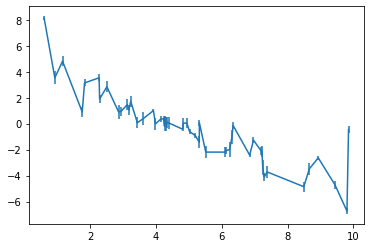

In [77]:
plt.errorbar(dara[0],dara[1],yerr=dara[2])

## Generating model

In [94]:
def chi(theta):
    suma = 0
    for index, element in enumerate(dara[0]):
        suma += (dara[1][index] - (theta[0]*dara[0][index] + theta[1]))**2 / dara[2][index]**2
    return suma

## Checking model

In [95]:
m = -1
b = 6
chi([m,b])

2154.651498070416

## Generating matrix of m's and b's

In [98]:
n = 10
m_range = np.linspace(0, -2, n)
b_range = np.linspace(2, 8, n)
chi_mesh = np.zeros((n,n))
mini = 100000000
for i,m in enumerate(m_range):
    for j, b in enumerate(b_range):
        chi_mesh[i][j] = chi([m, b])
        if chi_mesh[i][j] < mini:
            mini = chi_mesh[i][j]
            mini_m = m
            mini_b = b
print(mini)
print("m={:.4f} b={:.4f}".format(mini_m, mini_b))

1246.4692834694686
m=-1.1111 b=5.3333


[]

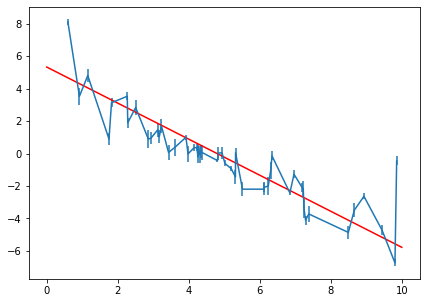

In [101]:
fig, ax = plt.subplots(figsize=(7, 5))
x = np.linspace(0,10,100)
ax.errorbar(dara[0],dara[1],yerr=dara[2])
ax.plot(x, mini_m * x + mini_b, color="Red")
ax.plot()

## Now, we try with random data

In [91]:
n_random = 10
m_range = [-2,0]
b_range = [2,8]

np.random.seed(5)

mRand = np.random.rand(n_random)
bRand = np.random.rand(n_random)

mRand = mRand*(m_range[1]-m_range[0]) + m_range[0]
bRand = bRand*(b_range[1]-b_range[0]) + b_range[0]

miniRandom = 100000000

#print(mRand)
#print(bRand)

for i,m in enumerate(mRand):
    for j, b in enumerate(bRand):
        aux = chi(m, b)
        #print(aux)
        if aux < miniRandom:
            miniRandom = aux
            randomMini_m = m
            randomMini_b = b
            
print(miniRandom)
print("m={:.4f} b={:.4f}".format(randomMini_m, randomMini_b))

1310.2063193586876
m=-0.9632 b=4.6479


[]

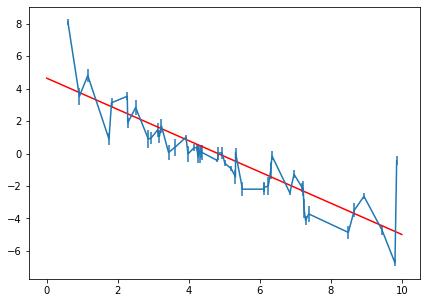

In [102]:
fig, ax = plt.subplots(figsize=(7, 5))
x = np.linspace(0,10,100)
ax.errorbar(dara[0],dara[1],yerr=dara[2])
ax.plot(x, randomMini_m * x + randomMini_b, color="Red")
ax.plot()

## Now, we going to try optimize

In [92]:
minimize(chi, -1, 6)

      fun: 1268.9807434194156
 hess_inv: array([[2.84529087e-05]])
      jac: array([0.00038147])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 34
      nit: 2
     njev: 11
   status: 2
  success: False
        x: array([-1.1954143])